# Check libraries versions

In [1]:
import sys
import scipy
import numpy
import matplotlib
import pandas
import sklearn

print(f'{"Python version: ": <22}{sys.version.split()[0]}')

for library in [scipy, numpy, matplotlib, pandas, sklearn]:
    print(f'{f"{library.__name__} version: ": <22}{library.__version__}')


Python version:       3.10.7
scipy version:        1.9.1
numpy version:        1.23.3
matplotlib version:   3.6.1
pandas version:       1.5.0
sklearn version:      1.1.2


# Libraries

In [2]:
import pandas as pd
from pandas.plotting import scatter_matrix

import seaborn as sns
from matplotlib import pyplot as plt

from sklearn.metrics import (
    classification_report,
    confusion_matrix,
    accuracy_score,
    f1_score,
    recall_score,
    precision_score
)

from sklearn.model_selection import (
    cross_val_score,
    StratifiedKFold,
    train_test_split
)

from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis


In [3]:
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/undocumented/connectionist-bench/sonar/sonar.all-data"

sonar_df = pd.read_csv(url, header=None)
sonar_df.columns = [f'feature_{number + 1}'
                    for number in range(sonar_df.shape[1] - 1)] +\
                        ['label']

sonar_df


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60,label
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [22]:
dataset_shape = sonar_df.shape
print(f'{dataset_shape[0]} rows × {dataset_shape[1]} columns')


208 rows × 61 columns


In [63]:
# sonar_df.describe().loc[['mean', 'std', 'min', 'max']]
sonar_df.describe()


,feature_1,feature_2,feature_3,feature_4,feature_5,feature_6,feature_7,feature_8,feature_9,feature_10,...,feature_51,feature_52,feature_53,feature_54,feature_55,feature_56,feature_57,feature_58,feature_59,feature_60
count,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,...,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000,208.000000
mean,0.029164,0.038437,0.043832,0.053892,0.075202,0.104570,0.121747,0.134799,0.178003,0.208259,...,0.016069,0.013420,0.010709,0.010941,0.009290,0.008222,0.007820,0.007949,0.007941,0.006507
std,0.022991,0.032960,0.038428,0.046528,0.055552,0.059105,0.061788,0.085152,0.118387,0.134416,...,0.012008,0.009634,0.007060,0.007301,0.007088,0.005736,0.005785,0.006470,0.006181,0.005031
min,0.001500,0.000600,0.001500,0.005800,0.006700,0.010200,0.003300,0.005500,0.007500,0.011300,...,0.000000,0.000800,0.000500,0.001000,0.000600,0.000400,0.000300,0.000300,0.000100,0.000600
25%,0.013350,0.016450,0.018950,0.024375,0.038050,0.067025,0.080900,0.080425,0.097025,0.111275,...,0.008425,0.007275,0.005075,0.005375,0.004150,0.004400,0.003700,0.003600,0.003675,0.003100
50%,0.022800,0.030800,0.034300,0.044050,0.062500,0.092150,0.106950,0.112100,0.152250,0.182400,...,0.013900,0.011400,0.009550,0.009300,0.007500,0.006850,0.005950,0.005800,0.006400,0.005300
75%,0.035550,0.047950,0.057950,0.064500,0.100275,0.134125,0.154000,0.169600,0.233425,0.268700,...,0.020825,0.016725,0.014900,0.014500,0.012100,0.010575,0.010425,0.010350,0.010325,0.008525
max,0.137100,0.233900,0.305900,0.426400,0.401000,0.382300,0.372900,0.459000,0.682800,0.710600,...,0.100400,0.070900,0.039000,0.035200,0.044700,0.039400,0.035500,0.044000,0.036400,0.043900


In [23]:
sonar_df.groupby('label').size()


label
M    111
R     97
dtype: int64

In [ ]:
sonar_df.plot(
                kind='box',
                subplots=True,
                layout=(15, 4),
                sharex=False,
                sharey=False,
                figsize=(20, 60)
            )
plt.show()


In [ ]:
sonar_df.hist(layout=(15, 4), figsize=(20, 60))
plt.show()


In [ ]:
scatter_matrix(sonar_df, figsize=(200, 200))
plt.show()


In [4]:
array = sonar_df.values

X = array[:, :-1]
y = array[:,-1]

X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.20, random_state=1)


In [5]:
names = []
results = []
models = []

models.append(('LR', LogisticRegression(solver='liblinear', multi_class='ovr')))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))

for name, model in models:
	kfold = StratifiedKFold(n_splits=10, random_state=42, shuffle=True)
	cv_results = cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	print(f'{name: <4}: {cv_results.mean() * 100:.2f} %\t (± {cv_results.std():.4f})')


LR  : 75.92 %	 (± 0.0963)
LDA : 72.32 %	 (± 0.0694)
KNN : 79.08 %	 (± 0.0862)
CART: 72.32 %	 (± 0.1213)
NB  : 69.26 %	 (± 0.1034)
SVM : 55.48 %	 (± 0.0307)


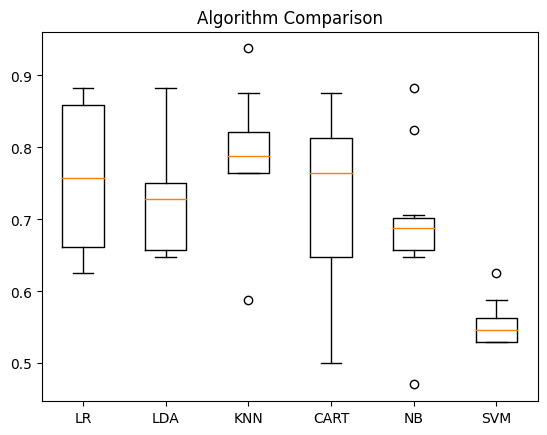

In [79]:
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()


# Full report for best model

In [10]:
def report(y_test_, y_pred_, labels: list, message: str='Report'):
    """
    Generate an evaluation report for classification models, including accuracy, precision, recall, and F1 score.

    Parameters:
    y_test_ (array-like): True labels of the test data.
    y_pred_ (array-like): Predicted labels of the test data.
    labels (list): List of unique class labels.
    message (str, optional): Custom message for the report title. Default is 'Report'.

    Returns:
    None

    Prints an evaluation report including accuracy, precision, recall, and F1 score.
    Also displays a confusion matrix heatmap and a detailed classification report.
    """

    # Calculate evaluation metrics
    accuracy = f'Accuracy:  {accuracy_score(y_test_, y_pred_):.4f}'
    precision_avg = f'Precision: {precision_score(y_test_, y_pred_, average="macro"):.4f}'
    recall_avg = f'Recall:    {recall_score(y_test_, y_pred_, average="macro"):.4f}'
    f1_avg = f'f1 score:  {f1_score(y_test_, y_pred_, average="macro"):.4f}'

    # Print evaluation metrics
    print(f'\n {message:-^53}\n\n{"Average":^53}\n{accuracy:^53}\n{precision_avg:^53}\n{recall_avg:^53}\n{f1_avg:^53}\n')

    # Create and display the confusion matrix heatmap
    con_df = pd.DataFrame(confusion_matrix(y_test_, y_pred_), columns=labels, index=labels)
    fig, ax = plt.subplots()
    fig.set_dpi(96)
    fig.tight_layout()
    sns.heatmap(con_df, annot=True, cbar=False, fmt='1d', cmap='gray', ax=ax, square=True, vmin=0, vmax=20)
    ax.set_title('Confusion Matrix', fontsize=14)
    ax.set_xlabel('Predicted', fontsize=12)
    ax.set_ylabel('Actual', fontsize=12)
    plt.show()

    # Print detailed classification report
    print(f"{'Classification report': ^53}\n", classification_report(y_test_, y_pred_), sep='\n', end=f"\n{'-' * 53}")



 -----------K Nearest Neighbors Classifier------------

                       Average                       
                  Accuracy:  0.7143                  
                  Precision: 0.7222                  
                  Recall:    0.7182                  
                  f1 score:  0.7136                  



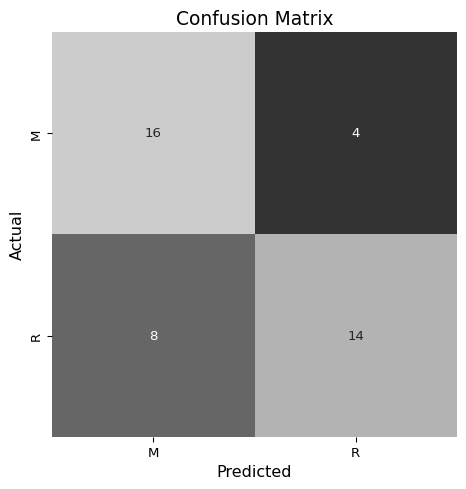

                Classification report                

              precision    recall  f1-score   support

           M       0.67      0.80      0.73        20
           R       0.78      0.64      0.70        22

    accuracy                           0.71        42
   macro avg       0.72      0.72      0.71        42
weighted avg       0.72      0.71      0.71        42

-----------------------------------------------------

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, Y_train)
Y_pred = model.predict(X_test)

report(Y_test, Y_pred, ['M', 'R'], 'K Nearest Neighbors Classifier')
